In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

In [4]:
data =pd.read_csv('data.csv')
data.head()

machineID             datetime  volt_min_3h  rotate_min_3h  \
0          1  2015-01-02 06:00:00   158.271400     403.235951   
1          1  2015-01-02 09:00:00   160.528861     384.645962   
2          1  2015-01-02 12:00:00   147.300678     412.965696   
3          1  2015-01-02 15:00:00   152.420775     385.354924   
4          1  2015-01-02 18:00:00   145.248486     424.542633   

   pressure_min_3h  vibration_min_3h  volt_max_3h  rotate_max_3h  \
0        92.439132         32.516838   200.872430     495.777958   
1        86.944273         29.527665   197.363124     486.459056   
2        90.711354         34.203042   173.394523     439.579460   
3        99.506819         30.665184   185.205355     497.840620   
4        93.743827         37.422272   180.030715     495.376449   

   pressure_max_3h  vibration_max_3h  ...    comp3    comp4  age  \
0        96.535487         52.355876  ...  155.000  170.000   18   
1       114.342061         42.992509  ...  155.125  170.125   18   
2       110.408985         37.117103  ...  155.250  170.250   18   
3       105.993247         47.862484  ...  155.375  170.375   18   
4       111.950587         43.099758  ...  155.500  170.500   18   

   model_model3  model_model4  failure_comp1  failure_comp2  failure_comp4  \
0             1             0              0              0              0   
1             1             0              0              0              0   
2             1             0              0              0              0   
3             1             0              0              0              0   
4             1             0              0              0              0   

   failure_none  failure_yes  
0             1            0  
1             1            0  
2             1            0  
3             1            0  
4             1            0  

[5 rows x 51 columns]

Yeni feature lar eklenmiş data:

In [5]:
data_fe=pd.read_csv('data_fe.csv')
data_fe.head()

machineID             datetime  volt_min_3h  rotate_min_3h  \
0          1  2015-01-02 06:00:00   158.271400     403.235951   
1          1  2015-01-02 09:00:00   160.528861     384.645962   
2          1  2015-01-02 12:00:00   147.300678     412.965696   
3          1  2015-01-02 15:00:00   152.420775     385.354924   
4          1  2015-01-02 18:00:00   145.248486     424.542633   

   pressure_min_3h  vibration_min_3h  volt_max_3h  rotate_max_3h  \
0        92.439132         32.516838   200.872430     495.777958   
1        86.944273         29.527665   197.363124     486.459056   
2        90.711354         34.203042   173.394523     439.579460   
3        99.506819         30.665184   185.205355     497.840620   
4        93.743827         37.422272   180.030715     495.376449   

   pressure_max_3h  vibration_max_3h  ...  vibration_mean_3h.1  \
0        96.535487         52.355876  ...            41.551544   
1       114.342061         42.992509  ...            36.105580   
2       110.408985         37.117103  ...            36.094637   
3       105.993247         47.862484  ...            40.483002   
4       111.950587         43.099758  ...            40.921802   

   rotate_mean_3h.1  pressure_mean_3h.1  volt_mean_3h.1  \
0        440.608320           94.137969      180.133784   
1        439.349655          101.553209      176.364293   
2        424.385316           99.598722      160.384568   
3        442.933997          102.380586      170.472461   
4        468.937558          102.726648      163.263806   

   vibration_mean_3h rotate_mean_3h  vibration_mean_3h pressure_mean_3h  \
0                      18307.955836                         3911.577947   
1                      15862.974130                         3666.637511   
2                      15318.033927                         3594.979719   
3                      17931.297683                         4144.673406   
4                      19189.769738                         4203.759507   

   vibration_mean_3h volt_mean_3h  rotate_mean_3h pressure_mean_3h  \
0                     7484.836785                     41477.972599   
1                     6367.735103                     44617.367294   
2                     5789.022762                     42268.235084   
3                     6901.236895                     45347.841985   
4                     6681.049070                     48172.383439   

   rotate_mean_3h volt_mean_3h  pressure_mean_3h volt_mean_3h  
0                 79368.443961                   16957.428664  
1                 77485.591372                   17910.359910  
2                 68064.855482                   15974.097993  
3                 75508.048424                   17453.070365  
4                 76560.530404                   16771.543483  

[5 rows x 121 columns]

In [6]:
data['datetime'] = pd.to_datetime(data['datetime'])


In [7]:
data_fe['datetime'] = pd.to_datetime(data_fe['datetime'])

In [8]:
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14565 entries, 0 to 14564
Columns: 121 entries, machineID to pressure_mean_3h volt_mean_3h
dtypes: datetime64[ns](1), float64(106), int64(14)
memory usage: 13.4 MB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14565 entries, 0 to 14564
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   machineID           14565 non-null  int64         
 1   datetime            14565 non-null  datetime64[ns]
 2   volt_min_3h         14565 non-null  float64       
 3   rotate_min_3h       14565 non-null  float64       
 4   pressure_min_3h     14565 non-null  float64       
 5   vibration_min_3h    14565 non-null  float64       
 6   volt_max_3h         14565 non-null  float64       
 7   rotate_max_3h       14565 non-null  float64       
 8   pressure_max_3h     14565 non-null  float64       
 9   vibration_max_3h    14565 non-null  float64       
 10  volt_mean_3h        14565 non-null  float64       
 11  rotate_mean_3h      14565 non-null  float64       
 12  pressure_mean_3h    14565 non-null  float64       
 13  vibration_mean_3h   14565 non-null  float64   

In [10]:
#data_fe için

# Tarih sütununu dönüştürme
data_fe['datetime'] = pd.to_datetime(data_fe['datetime'])
data_fe['year'] = data_fe['datetime'].dt.year
data_fe['month'] = data_fe['datetime'].dt.month
data_fe['day'] = data_fe['datetime'].dt.day
data_fe['hour'] = data_fe['datetime'].dt.hour
data_fe = data_fe.drop(columns=['datetime'])

Data_fe için yeni özellikler:

In [11]:
data_fe.columns

Index(['machineID', 'volt_min_3h', 'rotate_min_3h', 'pressure_min_3h',
       'vibration_min_3h', 'volt_max_3h', 'rotate_max_3h', 'pressure_max_3h',
       'vibration_max_3h', 'volt_mean_3h',
       ...
       'vibration_mean_3h rotate_mean_3h',
       'vibration_mean_3h pressure_mean_3h', 'vibration_mean_3h volt_mean_3h',
       'rotate_mean_3h pressure_mean_3h', 'rotate_mean_3h volt_mean_3h',
       'pressure_mean_3h volt_mean_3h', 'year', 'month', 'day', 'hour'],
      dtype='object', length=124)

Yeni Özellik Eklendi

In [12]:

data_fe['comp1_comp2_product'] = data_fe['comp1'] * data_fe['comp2']

from sklearn.preprocessing import PolynomialFeatures
# Polinomiyal özellikler oluşturma
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_fe[['comp1', 'comp2']])
poly_columns = poly.get_feature_names_out(input_features=['comp1', 'comp2'])
poly_df = pd.DataFrame(poly_features, columns=poly_columns)
data_fe = pd.concat([data_fe, poly_df], axis=1)


In [13]:
#data için

# Tarih sütununu dönüştürme
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data = data.drop(columns=['datetime'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler objesini oluşturun
scaler = MinMaxScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Ölçeklendirilmiş veriyi yeni bir DataFrame olarak saklamak için
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled_df.head()

machineID  volt_min_3h  rotate_min_3h  pressure_min_3h  vibration_min_3h  \
0        0.0     0.539591       0.647742         0.381845          0.302892   
1        0.0     0.560565       0.595184         0.325931          0.230814   
2        0.0     0.437663       0.675250         0.364264          0.343551   
3        0.0     0.485233       0.597189         0.453764          0.258243   
4        0.0     0.418596       0.707981         0.395122          0.421176   

   volt_max_3h  rotate_max_3h  pressure_max_3h  vibration_max_3h  \
0     0.575386       0.581281         0.132822          0.531161   
1     0.538724       0.556452         0.313263          0.287412   
2     0.288320       0.431551         0.273408          0.134463   
3     0.411710       0.586776         0.228661          0.414188   
4     0.357650       0.580211         0.289029          0.290204   

   volt_mean_3h  ...  model_model4  failure_comp1  failure_comp2  \
0      0.556252  ...           0.0            0.0            0.0   
1      0.510424  ...           0.0            0.0            0.0   
2      0.316153  ...           0.0            0.0            0.0   
3      0.438795  ...           0.0            0.0            0.0   
4      0.351157  ...           0.0            0.0            0.0   

   failure_comp4  failure_none  failure_yes  year  month       day      hour  
0            0.0           1.0          0.0   0.0    0.0  0.033333  0.285714  
1            0.0           1.0          0.0   0.0    0.0  0.033333  0.428571  
2            0.0           1.0          0.0   0.0    0.0  0.033333  0.571429  
3            0.0           1.0          0.0   0.0    0.0  0.033333  0.714286  
4            0.0           1.0          0.0   0.0    0.0  0.033333  0.857143  

[5 rows x 54 columns]

In [15]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler objesini oluşturun
scaler = MinMaxScaler()

data_fe_scaled = pd.DataFrame(scaler.fit_transform(data_fe), columns=data_fe.columns)

# Ölçeklendirilmiş veriyi yeni bir DataFrame olarak saklamak için
data_fe_scaled_df = pd.DataFrame(data_fe_scaled, columns=data_fe.columns)

data_fe_scaled_df.head()

machineID  volt_min_3h  rotate_min_3h  pressure_min_3h  vibration_min_3h  \
0        0.0     0.539591       0.647742         0.381845          0.302892   
1        0.0     0.560565       0.595184         0.325931          0.230814   
2        0.0     0.437663       0.675250         0.364264          0.343551   
3        0.0     0.485233       0.597189         0.453764          0.258243   
4        0.0     0.418596       0.707981         0.395122          0.421176   

   volt_max_3h  rotate_max_3h  pressure_max_3h  vibration_max_3h  \
0     0.575386       0.581281         0.132822          0.531161   
1     0.538724       0.556452         0.313263          0.287412   
2     0.288320       0.431551         0.273408          0.134463   
3     0.411710       0.586776         0.228661          0.414188   
4     0.357650       0.580211         0.289029          0.290204   

   volt_mean_3h  ...  year  month       day      hour  comp1_comp2_product  \
0      0.556252  ...   0.0    0.0  0.033333  0.285714             0.072203   
1      0.510424  ...   0.0    0.0  0.033333  0.428571             0.072696   
2      0.316153  ...   0.0    0.0  0.033333  0.571429             0.073190   
3      0.438795  ...   0.0    0.0  0.033333  0.714286             0.073685   
4      0.351157  ...   0.0    0.0  0.033333  0.857143             0.074180   

      comp1     comp2   comp1^2  comp1 comp2   comp2^2  
0  0.072497  0.665892  0.005256     0.072203  0.443413  
1  0.072950  0.666280  0.005322     0.072696  0.443928  
2  0.073403  0.666667  0.005388     0.073190  0.444444  
3  0.073856  0.667054  0.005455     0.073685  0.444961  
4  0.074309  0.667441  0.005522     0.074180  0.445477  

[5 rows x 130 columns]

data_fe için feature importance : Tek hedefli :

ValueError: All arrays must be of the same length

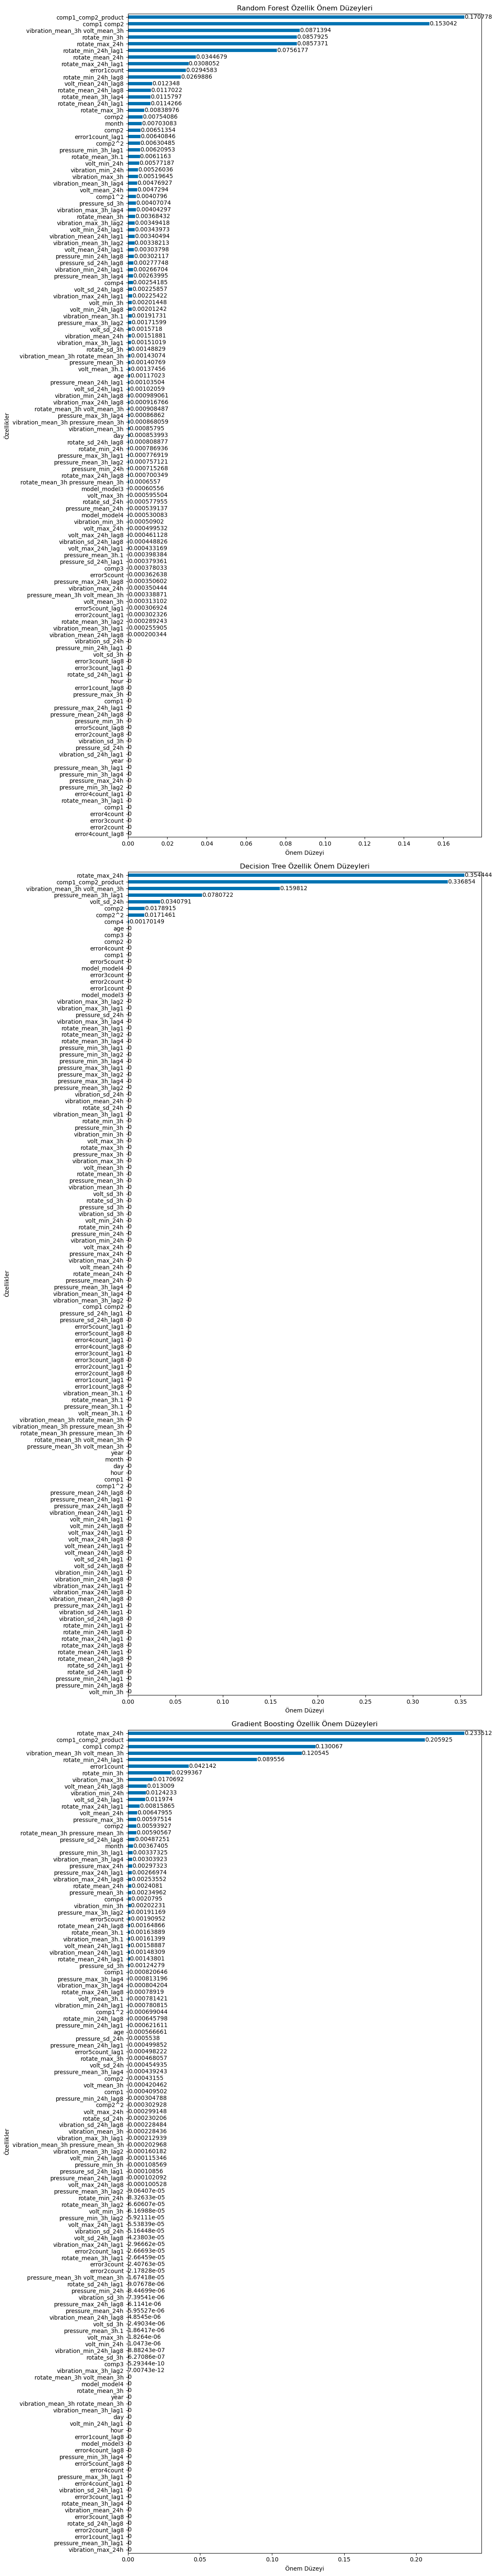

In [198]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# X ve y'yi tanımlama (Özellikler ve hedef değişken)
# data_encoded: Önceden hazırlanmış veri seti
# Burada, makine arızası hedef değişken (y) olarak alındı
X = data_fe_scaled.drop(columns=['failure_yes', 'machineID', 'failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none'])  # 'datetime' ve 'machineID' sütunlarını çıkar
y = data_fe_scaled['failure_yes']  # Hedef değişken olarak 'failure_yes' alınır

# RandomForestRegressor modelini oluşturma ve eğitme
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# DecisionTreeRegressor modelini oluşturma ve eğitme
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# GradientBoostingRegressor modelini oluşturma ve eğitme
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

# Özellik önemlerini belirleme
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)
gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Grafik yüksekliğini ayarlama
num_features = len(rf_feature_importances)
fig_height = max(6, num_features * 0.5)

# Grafik oluşturma
plt.figure(figsize=(12, fig_height))

# RandomForestRegressor özellik önemleri
plt.subplot(3, 1, 1)
rf_feature_importances.plot(kind='barh')
plt.title('Random Forest Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# DecisionTreeRegressor özellik önemleri
plt.subplot(3, 1, 2)
dt_feature_importances.plot(kind='barh')
plt.title('Decision Tree Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# GradientBoostingRegressor özellik önemleri
plt.subplot(3, 1, 3)
gb_feature_importances.plot(kind='barh')
plt.title('Gradient Boosting Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# Barların üstüne değerlerini yazma
for ax in plt.gcf().axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

plt.tight_layout()


# Excel'e yazdırma
feature_importances_df = pd.DataFrame({
    'features': X.columns,
    'rf_importance': rf_feature_importances[X.columns].values,
    'dt_importance': dt_feature_importances[X.columns].values,
    'gb_importance': gb_feature_importances[X.columns].values
})
feature_importances_df.to_excel('feature_importances_data_fe.xlsx', index=False)


plt.show()


data_fe için feature importance : Çok hedefli :

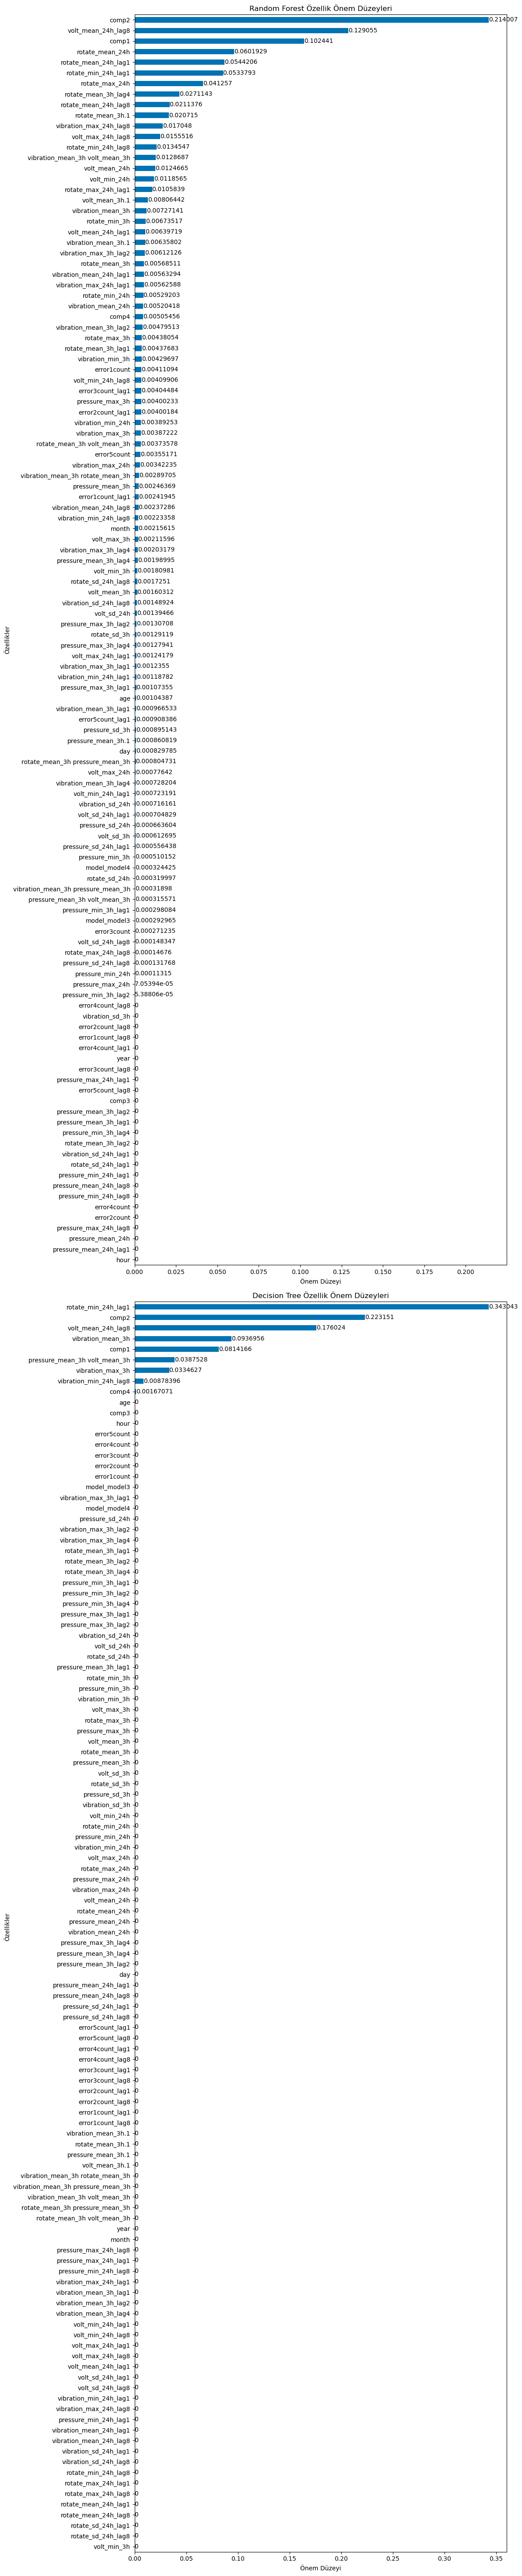

In [146]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# X ve y'yi tanımlama (Özellikler ve hedef değişken)
# data_encoded: Önceden hazırlanmış veri seti
# Burada, makine arızası hedef değişken (y) olarak alındı
X = data_fe_scaled.drop(columns=['failure_yes', 'machineID', 'failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none'])  # 'datetime' ve 'machineID' sütunlarını çıkar
y = data_fe_scaled[['failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none']]

# RandomForestRegressor modelini oluşturma ve eğitme
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# DecisionTreeRegressor modelini oluşturma ve eğitme
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)


# Özellik önemlerini belirleme
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Grafik yüksekliğini ayarlama
num_features = len(rf_feature_importances)
fig_height = max(6, num_features * 0.5)

# Grafik oluşturma
plt.figure(figsize=(12, fig_height))

# RandomForestRegressor özellik önemleri
plt.subplot(2, 1, 1)
rf_feature_importances.plot(kind='barh')
plt.title('Random Forest Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# DecisionTreeRegressor özellik önemleri
plt.subplot(2, 1, 2)
dt_feature_importances.plot(kind='barh')
plt.title('Decision Tree Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')


# Barların üstüne değerlerini yazma
for ax in plt.gcf().axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

plt.tight_layout()


# Excel'e yazdırma
feature_importances_df = pd.DataFrame({
    'features': X.columns,
    'rf_importance': rf_feature_importances[X.columns].values,
    'dt_importance': dt_feature_importances[X.columns].values,
})
feature_importances_df.to_excel('feature_importances_data_fe_multitarget.xlsx', index=False)


plt.show()


data için feature importance : Tek Hedefli 

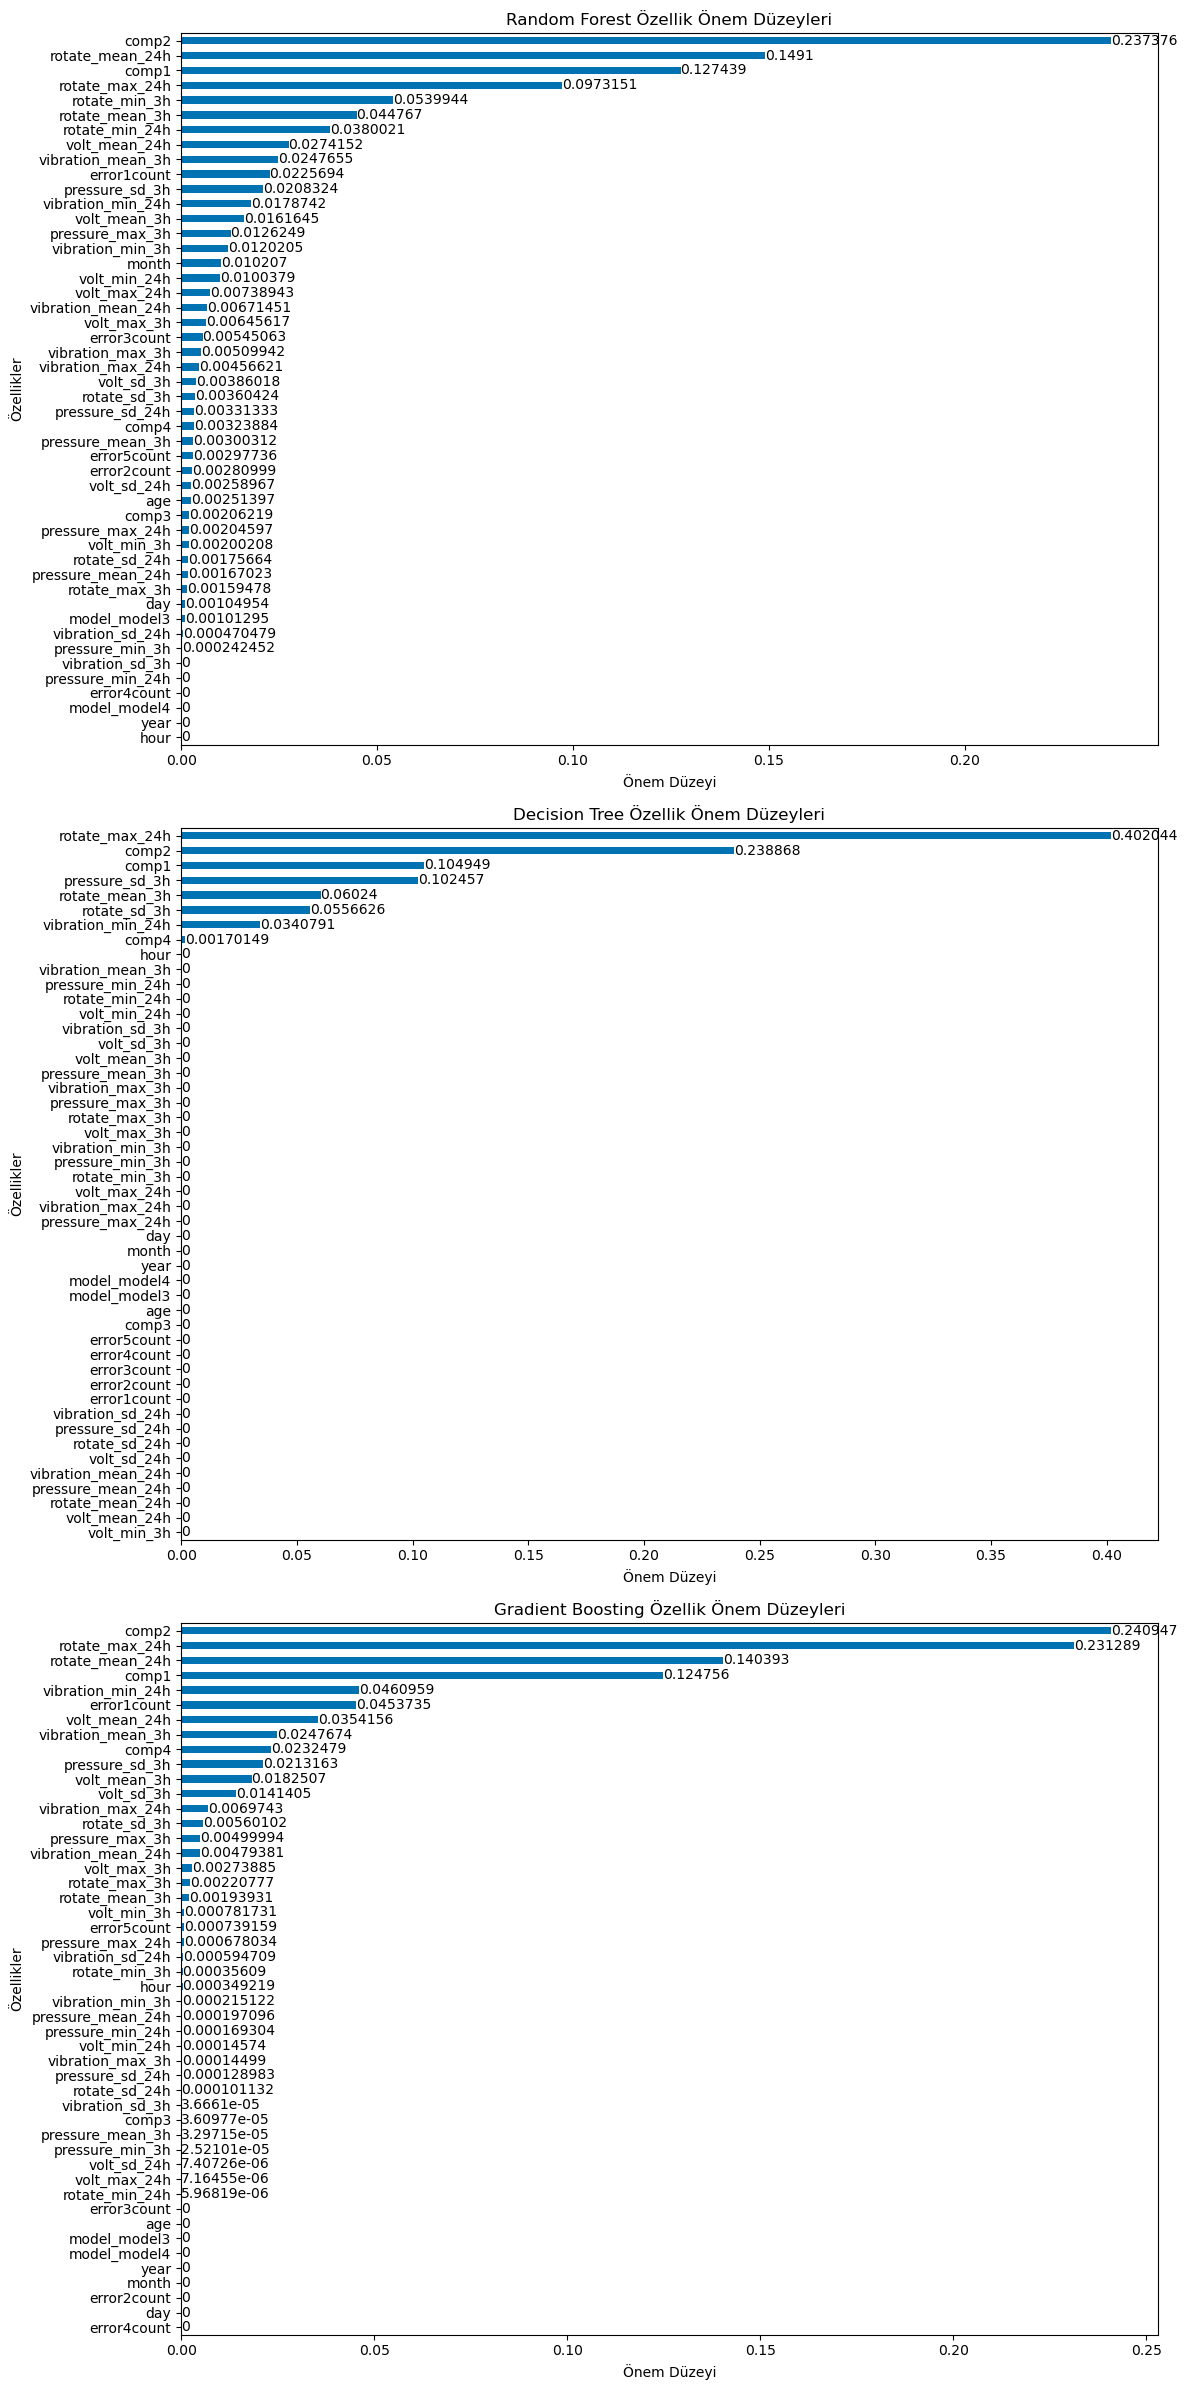

In [138]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor



# X ve y'yi tanımlama (Özellikler ve hedef değişken)
# data_encoded: Önceden hazırlanmış veri seti
# Burada, makine arızası hedef değişken (y) olarak alındı
X = data_scaled.drop(columns=['failure_yes', 'machineID', 'failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none'])  # 'datetime' ve 'machineID' sütunlarını çıkar
y = data_scaled['failure_yes']  # Hedef değişken olarak 'failure_yes' alınır

# RandomForestRegressor modelini oluşturma ve eğitme
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# DecisionTreeRegressor modelini oluşturma ve eğitme
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# GradientBoostingRegressor modelini oluşturma ve eğitme
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

# Özellik önemlerini belirleme
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)
gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Grafik yüksekliğini ayarlama
num_features = len(rf_feature_importances)
fig_height = max(6, num_features * 0.5)

# Grafik oluşturma ve Excel'e yazdırma
plt.figure(figsize=(12, fig_height))

# RandomForestRegressor özellik önemleri
plt.subplot(3, 1, 1)
rf_feature_importances.plot(kind='barh')
plt.title('Random Forest Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# DecisionTreeRegressor özellik önemleri
plt.subplot(3, 1, 2)
dt_feature_importances.plot(kind='barh')
plt.title('Decision Tree Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# GradientBoostingRegressor özellik önemleri
plt.subplot(3, 1, 3)
gb_feature_importances.plot(kind='barh')
plt.title('Gradient Boosting Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# Barların üstüne değerlerini yazma
for ax in plt.gcf().axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

plt.tight_layout()

# Excel'e yazdırma
feature_importances_data_df = pd.DataFrame({
    'features': X.columns,
    'rf_importance': rf_feature_importances[X.columns].values,
    'dt_importance': dt_feature_importances[X.columns].values,
    'gb_importance': gb_feature_importances[X.columns].values
})
feature_importances_data_df.to_excel('feature_importances_data.xlsx', index=False)

plt.show()


data için feature importance : Çok Hedefli 

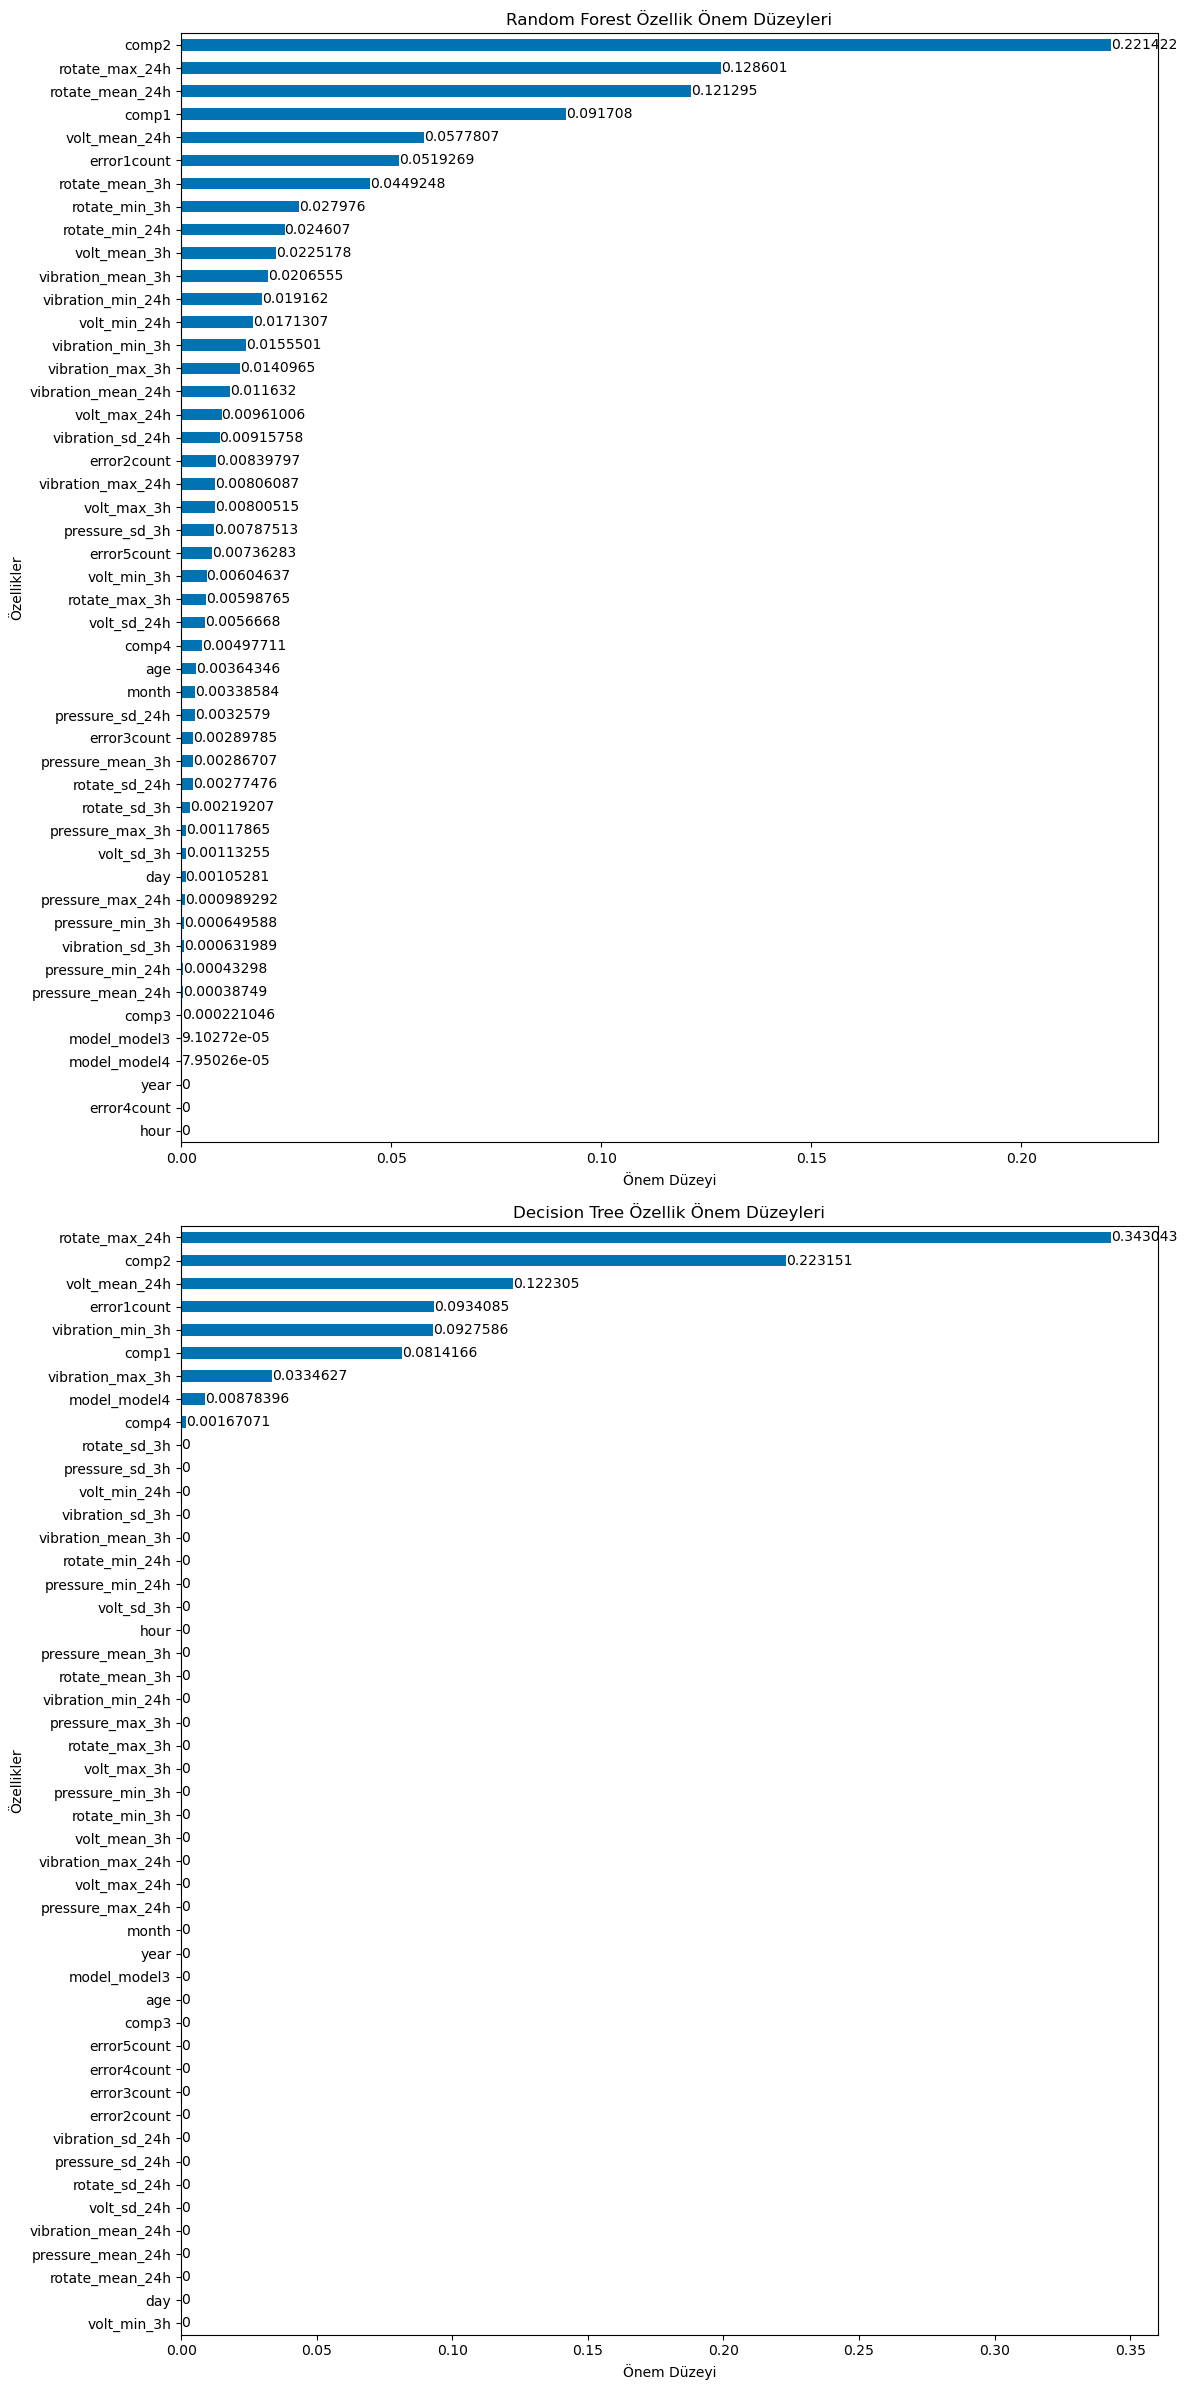

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



# X ve y'yi tanımlama (Özellikler ve hedef değişken)
# data_encoded: Önceden hazırlanmış veri seti
# Burada, makine arızası hedef değişken (y) olarak alındı
X = data_scaled.drop(columns=['failure_yes', 'machineID', 'failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none'])  # 'datetime' ve 'machineID' sütunlarını çıkar
y = data_scaled[['failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none']]

# RandomForestRegressor modelini oluşturma ve eğitme
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# DecisionTreeRegressor modelini oluşturma ve eğitme
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)


# Özellik önemlerini belirleme
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Grafik yüksekliğini ayarlama
num_features = len(rf_feature_importances)
fig_height = max(6, num_features * 0.5)

# Grafik oluşturma ve Excel'e yazdırma
plt.figure(figsize=(12, fig_height))

# RandomForestRegressor özellik önemleri
plt.subplot(2, 1, 1)
rf_feature_importances.plot(kind='barh')
plt.title('Random Forest Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# DecisionTreeRegressor özellik önemleri
plt.subplot(2, 1, 2)
dt_feature_importances.plot(kind='barh')
plt.title('Decision Tree Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')



# Barların üstüne değerlerini yazma
for ax in plt.gcf().axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

plt.tight_layout()

# Excel'e yazdırma
feature_importances_data_df = pd.DataFrame({
    'features': X.columns,
    'rf_importance': rf_feature_importances[X.columns].values,
    'dt_importance': dt_feature_importances[X.columns].values,

})
feature_importances_data_df.to_excel('feature_importances_data_multitarget.xlsx', index=False)

plt.show()


install:

In [ ]:
pip install catboost
pip install tensorflow
pip install lightgbm
pip install xgboost
pip install torch torchvision

# Libraries

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,  accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import SGDClassifier

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Tek Hedefli Modeller: ( Arıza Var mı Yok mu? )

Data İçin:

In [22]:
from sklearn.model_selection import train_test_split
# Hedef ve özellikleri ayırma
X = data.drop(columns=['failure_yes','failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none',])  # Özellikler
y = data['failure_yes']  # Hedef

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Model listesi
models = [
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('SVC', SVC()),
    ('KNeighbors', KNeighborsClassifier()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LGBM', LGBMClassifier(verbose=-1)),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('GaussianNB', GaussianNB()),
    ('BernoulliNB', BernoulliNB()),
    ('MultinomialNB', MultinomialNB()),
    ('MLP', MLPClassifier(max_iter=300))
]

# Hiperparametreler için grid
param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTree': {'max_depth': [3, 5, 7]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'ExtraTrees': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7]},
    'QDA': {},
    'LDA': {},
    'XGB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'LGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'GaussianNB': {},
    'BernoulliNB': {'alpha': [0.01, 0.1, 1]},
    'MultinomialNB': {'alpha': [0.01, 0.1, 1]},
    'MLP': {'hidden_layer_sizes': [(100,), (100, 50), (50, 50)], 'activation': ['relu', 'tanh']}
}

# Modellerin eğitimi ve değerlendirilmesi
results = []
for name, model in models:
    print(f"Training {name}")
    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

# Sonuçları yazdırma
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("\n")

Training LogisticRegression


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training DecisionTree
Training RandomForest
Training GradientBoosting
Training AdaBoost
Training ExtraTrees


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Bagging
Training SVC


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training KNeighbors


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\dis

Training QDA
Training LDA
Training XGB
Training LGBM
Training CatBoost
Training GaussianNB
Training BernoulliNB
Training MultinomialNB
Training MLP
Model: LogisticRegression
Best Params: {'C': 0.1}
Accuracy: 0.9977116704805492
Precision: 0.9963411874167023
Recall: 0.9977116704805492
F1 Score: 0.9970259579922466
Confusion Matrix:
[[4360    2]
 [   8    0]]


Model: DecisionTree
Best Params: {'max_depth': 7}
Accuracy: 0.9990846681922196
Precision: 0.9990846681922196
Recall: 0.9990846681922196
F1 Score: 0.9990846681922196
Confusion Matrix:
[[4360    2]
 [   2    6]]


Model: RandomForest
Best Params: {'max_depth': 7, 'n_estimators': 50}
Accuracy: 0.9986270022883296
Precision: 0.9986288882741972
Recall: 0.9986270022883296
F1 Score: 0.9982155747953478
Confusion Matrix:
[[4362    0]
 [   6    2]]


Model: GradientBoosting
Best Params: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.9995423340961098
Precision: 0.9996338672768877
Recall: 0.9995423340961098
F1 Score: 0.9995677075070725
C

C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En İyi sonuçlar : GradientBoosting, DecisionTree
İyi Sonuçlar: BernoulliNB, CatBoost, LGBM , Bagging

Data ve Multi Target Çalışmaları.

In [25]:
from sklearn.model_selection import train_test_split
# Hedef ve özellikleri ayırma
X = data.drop(columns=['failure_yes','failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none'])  # Özellikler
y = data[['failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none']]  # Hedef

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# her sütun için ayrı eğitim 


# Model listesi
models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LGBM', LGBMClassifier(verbose=-1)),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('BernoulliNB', BernoulliNB()),
    ('MLP', MLPClassifier(max_iter=300))
]

# Hiperparametreler için grid
param_grids = {
    'DecisionTree': {'max_depth': [3, 5, 7]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'ExtraTrees': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'XGB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'LGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'BernoulliNB': {'alpha': [0.01, 0.1, 1]},
    'MLP': {'hidden_layer_sizes': [(100,), (100, 50), (50, 50)], 'activation': ['relu', 'tanh']}
}

# Modellerin eğitimi ve değerlendirilmesi
results = []
for column in y_train.columns:
    print(f"Training models for {column}")
    y_train_col = y_train[column]
    y_test_col = y_test[column]
    
    for name, model in models:
        print(f"Training {name} for {column}")
        param_grid = param_grids.get(name, {})
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train_col)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test_col, y_pred)
        precision = precision_score(y_test_col, y_pred, average='weighted')
        recall = recall_score(y_test_col, y_pred, average='weighted')
        f1 = f1_score(y_test_col, y_pred, average='weighted')
        cm = confusion_matrix(y_test_col, y_pred)
        
        results.append({
            'Target Column': column,
            'Model': name,
            'Best Params': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

# Sonuçları yazdırma
for result in results:
    print(f"Target Column: {result['Target Column']}")
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("\n")

Training models for failure_comp1
Training DecisionTree for failure_comp1
Training RandomForest for failure_comp1


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training GradientBoosting for failure_comp1
Training AdaBoost for failure_comp1
Training ExtraTrees for failure_comp1


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Bagging for failure_comp1
Training XGB for failure_comp1
Training LGBM for failure_comp1


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training CatBoost for failure_comp1
Training BernoulliNB for failure_comp1
Training MLP for failure_comp1
Training models for failure_comp2
Training DecisionTree for failure_comp2
Training RandomForest for failure_comp2


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training GradientBoosting for failure_comp2
Training AdaBoost for failure_comp2
Training ExtraTrees for failure_comp2


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Bagging for failure_comp2
Training XGB for failure_comp2
Training LGBM for failure_comp2
Training CatBoost for failure_comp2
Training BernoulliNB for failure_comp2
Training MLP for failure_comp2


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training models for failure_comp4
Training DecisionTree for failure_comp4
Training RandomForest for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training GradientBoosting for failure_comp4
Training AdaBoost for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training ExtraTrees for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training Bagging for failure_comp4
Training XGB for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training LGBM for failure_comp4
Training CatBoost for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training BernoulliNB for failure_comp4
Training MLP for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training models for failure_none
Training DecisionTree for failure_none
Training RandomForest for failure_none
Training GradientBoosting for failure_none
Training AdaBoost for failure_none
Training ExtraTrees for failure_none


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Bagging for failure_none
Training XGB for failure_none
Training LGBM for failure_none
Training CatBoost for failure_none
Training BernoulliNB for failure_none
Training MLP for failure_none
Target Column: failure_comp1
Model: DecisionTree
Best Params: {'max_depth': 3}
Accuracy: 0.9995423340961098
Precision: 0.9997711670480549
Recall: 0.9995423340961098
F1 Score: 0.9996185593462654
Confusion Matrix:
[[4366    2]
 [   0    2]]


Target Column: failure_comp1
Model: RandomForest
Best Params: {'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.9995423340961098
Precision: 0.9990848776502993
Recall: 0.9995423340961098
F1 Score: 0.9993135535206701
Confusion Matrix:
[[4368    0]
 [   2    0]]


Target Column: failure_comp1
Model: GradientBoosting
Best Params: {'learning_rate': 0.2, 'n_estimators': 50}
Accuracy: 0.9995423340961098
Precision: 0.9997711670480549
Recall: 0.9995423340961098
F1 Score: 0.9996185593462654
Confusion Matrix:
[[4366    2]
 [   0    2]]


Target Column: failure_comp1


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Başarılı : Decision Tree , Gradient Boosting, AdaBoost , Bagging , LBGM? CatBoost ?
Orta: Random Forest ? , XGB ,BernoulliNB
Başarısız: MLP, ExtreTrees

In [165]:
#multioutputclassifier ile 
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LGBM', LGBMClassifier(verbose=-1)),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('BernoulliNB', BernoulliNB()),
    ('MLP', MLPClassifier(max_iter=300))
]

# Hiperparametreler için grid
param_grids = {
    'DecisionTree': {'estimator__max_depth': [3, 5, 7]},
    'RandomForest': {'estimator__n_estimators': [50, 100, 200], 'estimator__max_depth': [3, 5, 7]},
    'GradientBoosting': {'estimator__n_estimators': [50, 100, 200], 'estimator__learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'estimator__n_estimators': [50, 100, 200]},
    'ExtraTrees': {'estimator__n_estimators': [50, 100, 200], 'estimator__max_depth': [3, 5, 7]},
    'Bagging': {'estimator__n_estimators': [50, 100, 200]},
    'XGB': {'estimator__n_estimators': [50, 100, 200], 'estimator__learning_rate': [0.01, 0.1, 0.2]},
    'LGBM': {'estimator__n_estimators': [50, 100, 200], 'estimator__learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'estimator__iterations': [50, 100, 200], 'estimator__learning_rate': [0.01, 0.1, 0.2]},
    'BernoulliNB': {'estimator__alpha': [0.01, 0.1, 1]},
    'MLP': {'estimator__hidden_layer_sizes': [(100,), (100, 50), (50, 50)], 'estimator__activation': ['relu', 'tanh']}
}

results = []

for name, model in models:
    print(f"Training {name}")
    param_grid = param_grids.get(name, {})
    multi_model = MultiOutputClassifier(model)
    grid_search = GridSearchCV(multi_model, param_grid, cv=5, scoring='accuracy')
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Her bir sütun için confusion matrix
    cm_list = [confusion_matrix(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    
    results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrices': cm_list
    })

# Sonuçları yazdırma
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print("Confusion Matrices:")
    for i, cm in enumerate(result['Confusion Matrices']):
        print(f"Column {i} Confusion Matrix:\n{cm}")
    print("\n")


Training DecisionTree
Training RandomForest
Training GradientBoosting
Training AdaBoost
Training ExtraTrees
Training Bagging
Training XGB
Training LGBM
[LightGBM] [Info] Number of positive: 7, number of negative: 8149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000858 -> initscore=-7.059740
[LightGBM] [Info] Start training from score -7.059740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 8136, number of negative: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997548 -> initscore=6.008322
[LightGBM] [Info] Start training from score 6.008322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Info] Number of positive: 3, number of negative: 8153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000368 -> initscore=-7.907529
[LightGBM] [Info] Start training from score -7.907529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 7, number of negative: 8149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000858 -> initscore=-7.059740
[LightGBM] [Info] Start training from score -7.059740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 11, number of negative: 8145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001349 -> initscore=-6.607264
[LightGBM] [Info] Start training from score -6.607264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4, number of negative: 8152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000613 -> initscore=-7.396458
[LightGBM] [Info] Start training from sco

[LightGBM] [Info] Number of positive: 8, number of negative: 8148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000981 -> initscore=-6.926086
[LightGBM] [Info] Start training from score -6.926086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000613 -> initscore=-7.396458
[LightGBM] [Info] Start training from score -7.396458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001226 -> initscore=-6.702697
[LightGBM] [Info] Start training from score -6.702697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 7, number of negative: 8149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000858 -> initscore=-7.059740
[LightGBM] [Info] Start training from score -7.059740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 8136, number of negative: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997548 -> initscore=6.008322
[LightGBM] [Info] Start training from score 6.008322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3, number of negative: 8153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000368 -> initscore=-7.907529
[LightGBM] [Info] Start training from score -7.907529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 8143, number of negative: 13
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.998406 -> initscore=6.439965
[LightGBM] [Info] Start training from score 6.439965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 2, number of negative: 8154
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000245 -> initscore=-8.313117
[LightGBM] [Info] Start training from score -8.313117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1, number of negative: 8155
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000123 -> initscore=-9.006387
[LightGBM] [Info] Start training from score -9.006387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 8136, number of negative: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997548 -> initscore=6.008322
[LightGBM] [Info] Start training from score 6.008322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4, number of negative: 8152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number o

[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000613 -> initscore=-7.396458
[LightGBM] [Info] Start training from score -7.396458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 7, number of negative: 8149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000858 -> initscore=-7.059740
[LightGBM] [Info] Start training from score -7.059740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 11, number of negative: 8145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_col_wise=true` to remo

[LightGBM] [Info] Number of positive: 8136, number of negative: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997548 -> initscore=6.008322
[LightGBM] [Info] Start training from score 6.008322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 8143, number of negative: 13
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.998406 -> initscore=6.439965
[LightGBM] [Info] Start training from score 6.439965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000613 -> initscore=-7.396458
[LightGBM] [Info] Start training from score -7.396458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 7, number of negative: 8149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000858 -> initscore=-7.059740
[LightGBM] [Info] Start training from score -7.059740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000613 -> initscore=-7.396458
[LightGBM] [Info] Start training from score -7.396458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000613 -> initscore=-7.396458
[LightGBM] [Info] Start training from score -7.396458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 8139, number of negative: 17
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997916 -> initscore=6.171209
[LightGBM] [Info] Start training from score 6.171209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 7, number of negative: 8149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4, number of negative: 8152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tota

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing co

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000613 -> initscore=-7.396458
[LightGBM] [Info] Start training from score -7.396458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Info] Number of positive: 8140, number of negative: 16
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.998038 -> initscore=6.231957
[LightGBM] [Info] Start training from score 6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 8, number of negative: 8148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000981 -> initscore=-6.926086
[LightGBM] [Info] Start training from score -6.926086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pav

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Info] Number of positive: 8136, number of negative: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.997548 -> initscore=6.008322
[LightGBM] [Info] Start training from score 6.008322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Info] Number of positive: 6, number of negative: 8150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000736 -> initscore=-7.214014
[LightGBM] [Info] Start training from score -7.214014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 5, number of negative: 8151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000613 -> initscore=-7.396458
[LightGBM] [Info] Start training from score -7.396458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Info] Number of positive: 3, number of negative: 8153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000368 -> initscore=-7.907529
[LightGBM] [Info] Start training from score -7.907529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 11, number of negative: 10184
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9259
[LightGBM] [Info] Number of data points in the train set: 10195, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001079 -> initscore=-6.830678
[LightGBM] [Info] Start training from score -6.830678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
Data_fe (feature engineering) İçin :

Tek Hedef

In [199]:
from sklearn.model_selection import train_test_split
# Hedef ve özellikleri ayırma
X = data_fe.drop(columns=['failure_yes','failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none',])  # Özellikler
y = data_fe['failure_yes']  # Hedef

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [157]:
# kötü sonuç alan modeller kaldırıldı.
# Model listesi
models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('BernoulliNB', BernoulliNB()),
]

# Hiperparametreler için grid
param_grids = {

    'DecisionTree': {'max_depth': [3, 5, 7]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'BernoulliNB': {'alpha': [0.01, 0.1, 1]},
}

# Modellerin eğitimi ve değerlendirilmesi
results = []
for name, model in models:
    print(f"Training {name}")
    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division = 0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

# Sonuçları yazdırma
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("\n")

Training LogisticRegression


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training DecisionTree
Training RandomForest


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training GradientBoosting
Training AdaBoost


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training ExtraTrees


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Bagging
Training SVC


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training KNeighbors


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training QDA


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training LDA
Training XGB
Training LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24581
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24581
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24580
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24581
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24581
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003511 seconds.
You can set `force_col_wise=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24581
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24581
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24581
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24581
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24580
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stop

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training CatBoost
Training GaussianNB
Training BernoulliNB
Training MultinomialNB
Training MLP
Model: LogisticRegression
Best Params: {'C': 1}
Accuracy: 0.9977116704805492
Pre

C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
# 'comp1' ve 'comp2' isimli sütunların birer tanesini kaldırma
data_fe = data_fe.loc[:, ~data_fe.columns.duplicated()]

# İlk 10 satırı seçme ve sadece 'comp1' ve 'comp2' sütunlarını döndürme
subset = data_fe[['comp1', 'comp2']].head(10)

# Sonucu görüntüleme
print(subset)

    comp1    comp2
0  20.000  215.000
1  20.125  215.125
2  20.250  215.250
3  20.375  215.375
4  20.500  215.500
5  20.625  215.625
6  20.750  215.750
7  20.875  215.875
8  21.000  216.000
9  21.125  216.125


In [206]:
comp1_columns = [col for col in data_fe.columns if 'comp2' in col]

# comp1 sütunlarını kontrol etme
print(comp1_columns)


['comp2', 'failure_comp2', 'comp1_comp2_product', 'comp2', 'comp1 comp2', 'comp2^2']


Data_fe ve Multi Target Çalışmaları.

In [212]:
from sklearn.model_selection import train_test_split
# Hedef ve özellikleri ayırma
X = data_fe_scaled.drop(columns=['failure_yes','failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none'])  # Özellikler
y = data_fe_scaled[['failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none']]  # Hedef

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [213]:
# her sütun için ayrı eğitim 


# Model listesi
models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('Bagging', BaggingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('BernoulliNB', BernoulliNB()),
]

# Hiperparametreler için grid
param_grids = {
    'DecisionTree': {'max_depth': [3, 5, 7]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'XGB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'BernoulliNB': {'alpha': [0.01, 0.1, 1]},
}

# Modellerin eğitimi ve değerlendirilmesi
results = []
for column in y_train.columns:
    print(f"Training models for {column}")
    y_train_col = y_train[column]
    y_test_col = y_test[column]
    
    for name, model in models:
        print(f"Training {name} for {column}")
        param_grid = param_grids.get(name, {})
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train_col)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test_col, y_pred)
        precision = precision_score(y_test_col, y_pred, average='weighted')
        recall = recall_score(y_test_col, y_pred, average='weighted')
        f1 = f1_score(y_test_col, y_pred, average='weighted')
        cm = confusion_matrix(y_test_col, y_pred)
        
        results.append({
            'Target Column': column,
            'Model': name,
            'Best Params': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

# Sonuçları yazdırma
for result in results:
    print(f"Target Column: {result['Target Column']}")
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("\n")

Training models for failure_comp1
Training DecisionTree for failure_comp1
Training RandomForest for failure_comp1


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training GradientBoosting for failure_comp1
Training Bagging for failure_comp1
Training XGB for failure_comp1
Training CatBoost for failure_comp1
Training BernoulliNB for failure_comp1
Training models for failure_comp2
Training DecisionTree for failure_comp2
Training RandomForest for failure_comp2
Training GradientBoosting for failure_comp2
Training Bagging for failure_comp2
Training XGB for failure_comp2
Training CatBoost for failure_comp2
Training BernoulliNB for failure_comp2
Training models for failure_comp4
Training DecisionTree for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training RandomForest for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training GradientBoosting for failure_comp4
Training Bagging for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training XGB for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training CatBoost for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training BernoulliNB for failure_comp4
Training models for failure_none
Training DecisionTree for failure_none
Training RandomForest for failure_none
Training GradientBoosting for failure_none
Training Bagging for failure_none
Training XGB for failure_none
Training CatBoost for failure_none
Training BernoulliNB for failure_none
Target Column: failure_comp1
Model: DecisionTree
Best Params: {'max_depth': 5}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[4368    0]
 [   0    2]]


Target Column: failure_comp1
Model: RandomForest
Best Params: {'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.9995423340961098
Precision: 0.9990848776502993
Recall: 0.9995423340961098
F1 Score: 0.9993135535206701
Confusion Matrix:
[[4368    0]
 [   2    0]]


Target Column: failure_comp1
Model: GradientBoosting
Best Params: {'learning_rate': 0.01, 'n_estimators': 100}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[4368    0]
 [   0    2]]


Target Column:

In [ ]:
#multioutputclassifier ile 
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('Bagging', BaggingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('BernoulliNB', BernoulliNB()),

]

# Hiperparametreler için grid
param_grids = {
    'DecisionTree': {'estimator__max_depth': [3, 5, 7]},
    'RandomForest': {'estimator__n_estimators': [50, 100, 200], 'estimator__max_depth': [3, 5, 7]},
    'GradientBoosting': {'estimator__n_estimators': [50, 100, 200], 'estimator__learning_rate': [0.01, 0.1, 0.2]},
    'Bagging': {'estimator__n_estimators': [50, 100, 200]},
    'XGB': {'estimator__n_estimators': [50, 100, 200], 'estimator__learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'estimator__iterations': [50, 100, 200], 'estimator__learning_rate': [0.01, 0.1, 0.2]},
    'BernoulliNB': {'estimator__alpha': [0.01, 0.1, 1]},

}

results = []

for name, model in models:
    print(f"Training {name}")
    param_grid = param_grids.get(name, {})
    multi_model = MultiOutputClassifier(model)
    grid_search = GridSearchCV(multi_model, param_grid, cv=5, scoring='accuracy')
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Her bir sütun için confusion matrix
    cm_list = [confusion_matrix(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    
    results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrices': cm_list
    })

# Sonuçları yazdırma
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print("Confusion Matrices:")
    for i, cm in enumerate(result['Confusion Matrices']):
        print(f"Column {i} Confusion Matrix:\n{cm}")
    print("\n")


# Feature Eliminasyon

Feature importance a göre rf dt ve gb algoritmalarına göre 

data_fe içinden feature eliminasyonu.

In [28]:
columns_to_drop = [
    'volt_min_3h', 'pressure_min_3h', 'volt_max_3h', 'rotate_max_3h',
    'pressure_mean_3h', 'rotate_sd_3h', 'vibration_sd_3h', 'pressure_min_24h',
    'volt_max_24h', 'pressure_max_24h', 'vibration_max_24h', 'pressure_mean_24h',
    'volt_sd_24h', 'rotate_sd_24h', 'pressure_sd_24h', 'vibration_sd_24h',
    'error2count', 'error3count', 'error4count', 'comp3', 'age', 'model_model3',
    'model_model4', 'vibration_max_3h_lag1', 'vibration_max_3h_lag2',
    'vibration_max_3h_lag4', 'rotate_mean_3h_lag1', 'rotate_mean_3h_lag2',
    'pressure_min_3h_lag1', 'pressure_min_3h_lag2', 'pressure_min_3h_lag4',
    'pressure_max_3h_lag1', 'pressure_max_3h_lag2', 'pressure_max_3h_lag4',
    'pressure_mean_3h_lag1', 'pressure_mean_3h_lag2', 'vibration_mean_3h_lag1',
    'volt_min_24h_lag1', 'volt_min_24h_lag8', 'volt_max_24h_lag1',
    'volt_mean_24h_lag1', 'volt_sd_24h_lag1', 'volt_sd_24h_lag8',
    'vibration_min_24h_lag1', 'vibration_min_24h_lag8', 'vibration_max_24h_lag1',
    'vibration_max_24h_lag8', 'vibration_mean_24h_lag1', 'vibration_mean_24h_lag8',
    'vibration_sd_24h_lag1', 'vibration_sd_24h_lag8', 'rotate_max_24h_lag8',
    'rotate_sd_24h_lag1', 'rotate_sd_24h_lag8', 'pressure_min_24h_lag1',
    'pressure_min_24h_lag8', 'pressure_max_24h_lag1', 'pressure_max_24h_lag8',
    'pressure_mean_24h_lag1', 'pressure_mean_24h_lag8', 'pressure_sd_24h_lag1',
    'pressure_sd_24h_lag8', 'error5count_lag1', 'error5count_lag8',
    'error4count_lag1', 'error4count_lag8', 'error3count_lag1', 'error3count_lag8',
    'error2count_lag1', 'error2count_lag8', 'error1count_lag1', 'error1count_lag8',
    'vibration_mean_3h.1', 'pressure_mean_3h.1', 'volt_mean_3h.1',
    'vibration_mean_3h rotate_mean_3h', 'vibration_mean_3h pressure_mean_3h',
    'rotate_mean_3h pressure_mean_3h', 'rotate_mean_3h volt_mean_3h',
    'pressure_mean_3h volt_mean_3h', 'year', 'month', 'day', 'hour', 'comp1^2', 'comp2^2'
]


# Sütunları çıkarma
data_fe_del = data_fe.drop(columns=columns_to_drop)

# Yeni veri çerçevesini kaydetme
#data_fe_del.to_csv('data_fe_del.csv', index=False) 
data_fe_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14565 entries, 0 to 14564
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   machineID                       14565 non-null  int64  
 1   rotate_min_3h                   14565 non-null  float64
 2   vibration_min_3h                14565 non-null  float64
 3   pressure_max_3h                 14565 non-null  float64
 4   vibration_max_3h                14565 non-null  float64
 5   volt_mean_3h                    14565 non-null  float64
 6   rotate_mean_3h                  14565 non-null  float64
 7   vibration_mean_3h               14565 non-null  float64
 8   volt_sd_3h                      14565 non-null  float64
 9   pressure_sd_3h                  14565 non-null  float64
 10  volt_min_24h                    14565 non-null  float64
 11  rotate_min_24h                  14565 non-null  float64
 12  vibration_min_24h               

In [29]:
from sklearn.model_selection import train_test_split
# Hedef ve özellikleri ayırma
X = data_fe_del.drop(columns=['failure_yes','failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none',])  # Özellikler
y = data_fe_del['failure_yes']  # Hedef

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [216]:
# Model listesi
models = [
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('SVC', SVC()),
    ('KNeighbors', KNeighborsClassifier()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LGBM', LGBMClassifier(verbose=-1)),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('GaussianNB', GaussianNB()),
    ('BernoulliNB', BernoulliNB()),
    ('MultinomialNB', MultinomialNB()),
    ('MLP', MLPClassifier(max_iter=300))
]

# Hiperparametreler için grid
param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTree': {'max_depth': [3, 5, 7]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'ExtraTrees': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7]},
    'QDA': {},
    'LDA': {},
    'XGB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'LGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'GaussianNB': {},
    'BernoulliNB': {'alpha': [0.01, 0.1, 1]},
    'MultinomialNB': {'alpha': [0.01, 0.1, 1]},
    'MLP': {'hidden_layer_sizes': [(100,), (100, 50), (50, 50)], 'activation': ['relu', 'tanh']}
}

# Modellerin eğitimi ve değerlendirilmesi
results = []
for name, model in models:
    print(f"Training {name}")
    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

# Sonuçları yazdırma
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("\n")

Training LogisticRegression


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training DecisionTree
Training RandomForest
Training GradientBoosting
Training AdaBoost
Training ExtraTrees


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Bagging
Training SVC


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training KNeighbors


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\dis

Training QDA
Training LDA
Training XGB
Training LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8680
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8680
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001027 seconds.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8680
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8680
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8680
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 37
[LightGBM] [Info] [binary:Bo

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8680
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8680
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16, number of negative: 8140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8680
[LightGBM] [Info] Number of data points in the train set: 8156, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001962 -> initscore=-6.231957
[LightGBM] [Info] Start training from score -6.231957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


İyi: CatBoost LBGM Bagging GradientBoosting Adaboost RandomForest DecisionTree                       
Kötü: MLP, MultinomialNB, BernoulliNB, GaussianNB LDA XGB QDA KNeighbors SVC ExtraTrees LogisticRegression

In [218]:
from sklearn.model_selection import train_test_split
# Hedef ve özellikleri ayırma
X = data_fe_del.drop(columns=['failure_yes','failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none'])  # Özellikler
y = data_fe_del[['failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none']]  # Hedef

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [220]:
# her sütun için ayrı eğitim 


# Model listesi
models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('Bagging', BaggingClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('BernoulliNB', BernoulliNB()),
]

# Hiperparametreler için grid
param_grids = {
    'DecisionTree': {'max_depth': [3, 5, 7]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'XGB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'BernoulliNB': {'alpha': [0.01, 0.1, 1]},
}

# Modellerin eğitimi ve değerlendirilmesi
results = []
for column in y_train.columns:
    print(f"Training models for {column}")
    y_train_col = y_train[column]
    y_test_col = y_test[column]
    
    for name, model in models:
        print(f"Training {name} for {column}")
        param_grid = param_grids.get(name, {})
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train_col)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test_col, y_pred)
        precision = precision_score(y_test_col, y_pred, average='weighted')
        recall = recall_score(y_test_col, y_pred, average='weighted')
        f1 = f1_score(y_test_col, y_pred, average='weighted')
        cm = confusion_matrix(y_test_col, y_pred)
        
        # Cross-validation scores
        cv_scores = cross_val_score(best_model, X_train, y_train_col, cv=5, scoring='accuracy')
        
        results.append({
            'Target Column': column,
            'Model': name,
            'Best Params': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm,
            'CV Mean Accuracy': cv_scores.mean(),
            'CV Std Accuracy': cv_scores.std(),
            'CV Scores': cv_scores
        })

# Sonuçları yazdırma
for result in results:
    print(f"Target Column: {result['Target Column']}")
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"CV Mean Accuracy: {result['CV Mean Accuracy']}")
    print(f"CV Std Accuracy: {result['CV Std Accuracy']}")
    print(f"CV Scores: {result['CV Scores']}")
    print("\n")

Training models for failure_comp1
Training DecisionTree for failure_comp1
Training RandomForest for failure_comp1
Training GradientBoosting for failure_comp1
Training Bagging for failure_comp1
Training XGB for failure_comp1
Training CatBoost for failure_comp1
Training BernoulliNB for failure_comp1
Training models for failure_comp2
Training DecisionTree for failure_comp2
Training RandomForest for failure_comp2
Training GradientBoosting for failure_comp2
Training Bagging for failure_comp2
Training XGB for failure_comp2
Training CatBoost for failure_comp2
Training BernoulliNB for failure_comp2
Training models for failure_comp4
Training DecisionTree for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training RandomForest for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training GradientBoosting for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training Bagging for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training XGB for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training CatBoost for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training BernoulliNB for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training models for failure_none
Training DecisionTree for failure_none
Training RandomForest for failure_none
Training GradientBoosting for failure_none
Training Bagging for failure_none
Training XGB for failure_none
Training CatBoost for failure_none
Training BernoulliNB for failure_none
Target Column: failure_comp1
Model: DecisionTree
Best Params: {'max_depth': 3}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[4368    0]
 [   0    2]]
CV Mean Accuracy: 1.0
CV Std Accuracy: 0.0
CV Scores: [1. 1. 1. 1. 1.]


Target Column: failure_comp1
Model: RandomForest
Best Params: {'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.9997711670480549
Precision: 0.9997712194245603
Recall: 0.9997711670480549
F1 Score: 0.9997330413183557
Confusion Matrix:
[[4368    0]
 [   1    1]]
CV Mean Accuracy: 0.9998038254046101
CV Std Accuracy: 0.00024026382960106978
CV Scores: [1.         1.         1.         0.99950956 0.99950956]


Target Column: failure_comp1
Model: GradientBoosti

İyi:CatBoost Bagging GradientBoosting RandomForest DecisionTree                           
Kötü: BernoulliNB XGB

Veriseti sadeleştirme


In [226]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
import numpy as np
import pandas as pd

# Hedef değişkenlerin listesi olarak y sütunlarını al
y_columns = list(y.columns)

# Her bir hedef değişken için işlem yapmak için döngü
for y_col in y_columns:
    print(f"Processing for target variable: {y_col}")

    # GradientBoostingRegressor modelini oluşturma ve eğitme
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X, y[y_col])

    # BaggingRegressor modelini oluşturma ve eğitme
    bagging_model = BaggingRegressor()
    bagging_model.fit(X, y[y_col])

    # Gradient Boosting için özellik önemlerini belirleme
    gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Bagging için özellik önemlerini belirleme
    # Temel tahmin edicilerin (base estimators) özellik önemlerini toplamak
    bagging_feature_importances = np.zeros(len(X.columns))
    for base_estimator in bagging_model.estimators_:
        if hasattr(base_estimator, 'feature_importances_'):
            bagging_feature_importances += base_estimator.feature_importances_
    
    # Ortalama alarak özellik önemlerini normalleştirme
    bagging_feature_importances /= len(bagging_model.estimators_)

    # Sıralama
    bagging_feature_importances = pd.Series(bagging_feature_importances, index=X.columns).sort_values(ascending=False)

    # Excel'e yazdırma
    feature_importances_df = pd.DataFrame({
        'features': X.columns,
        f'{y_col}_gb_importance': gb_feature_importances[X.columns].values,
        f'{y_col}_bagging_importance': bagging_feature_importances[X.columns].values
    })
    feature_importances_df.to_excel(f'feature_importances_{y_col}.xlsx', index=False)


Processing for target variable: failure_comp1
Processing for target variable: failure_comp2
Processing for target variable: failure_comp4
Processing for target variable: failure_none


Baggging ve GradientBoosting Feature İmportance a Göre ( Tüm hedef Sütunlar İncelenmiştir.)

In [228]:
columns_to_drop = ['machineID', 'pressure_max_3h', 'rotate_mean_3h', 'volt_sd_3h', 'rotate_min_24h', 'pressure_mean_3h_lag4', 'volt_max_24h_lag8']
data_fe_del = data_fe_del.drop(columns=columns_to_drop)
data_fe_del.head()

rotate_min_3h  vibration_min_3h  vibration_max_3h  volt_mean_3h  \
0     403.235951         32.516838         52.355876    180.133784   
1     384.645962         29.527665         42.992509    176.364293   
2     412.965696         34.203042         37.117103    160.384568   
3     385.354924         30.665184         47.862484    170.472461   
4     424.542633         37.422272         43.099758    163.263806   

   vibration_mean_3h  pressure_sd_3h  volt_min_24h  vibration_min_24h  \
0          41.551544        2.135684    151.335682          25.990511   
1          36.105580       13.789279    151.335682          25.990511   
2          36.094637        9.988609    147.300678          25.990511   
3          40.483002        3.305739    147.300678          29.527665   
4          40.921802        9.105775    147.300678          29.527665   

   rotate_max_24h  volt_mean_24h  ...  volt_mean_24h_lag8  \
0      527.349825     169.733809  ...          169.733809   
1      527.349825     170.614862  ...          170.614862   
2      519.452812     169.893965  ...          169.893965   
3      519.452812     171.243444  ...          171.243444   
4      519.452812     170.792486  ...          170.792486   

   rotate_min_24h_lag1  rotate_min_24h_lag8  rotate_max_24h_lag1  \
0           346.149335           346.149335           527.349825   
1           346.149335           346.149335           527.349825   
2           346.149335           382.483543           527.349825   
3           382.483543           382.483543           519.452812   
4           382.483543           382.483543           519.452812   

   rotate_mean_24h_lag1  rotate_mean_24h_lag8  rotate_mean_3h.1  \
0            445.179865            445.179865        440.608320   
1            445.179865            446.364859        439.349655   
2            446.364859            447.009408        424.385316   
3            447.009408            444.233564        442.933997   
4            444.233564            448.440437        468.937558   

   vibration_mean_3h volt_mean_3h  comp1_comp2_product  comp1 comp2  
0                     7484.836785          4300.000000  4300.000000  
1                     6367.735103          4329.390625  4329.390625  
2                     5789.022762          4358.812500  4358.812500  
3                     6901.236895          4388.265625  4388.265625  
4                     6681.049070          4417.750000  4417.750000  

[5 rows x 35 columns]

In [231]:
data_fe_del.columns

Index(['rotate_min_3h', 'vibration_min_3h', 'vibration_max_3h', 'volt_mean_3h',
       'vibration_mean_3h', 'pressure_sd_3h', 'volt_min_24h',
       'vibration_min_24h', 'rotate_max_24h', 'volt_mean_24h',
       'rotate_mean_24h', 'vibration_mean_24h', 'error1count', 'error5count',
       'comp1', 'comp2', 'comp4', 'failure_comp1', 'failure_comp2',
       'failure_comp4', 'failure_none', 'failure_yes', 'rotate_mean_3h_lag4',
       'vibration_mean_3h_lag2', 'vibration_mean_3h_lag4',
       'volt_mean_24h_lag8', 'rotate_min_24h_lag1', 'rotate_min_24h_lag8',
       'rotate_max_24h_lag1', 'rotate_mean_24h_lag1', 'rotate_mean_24h_lag8',
       'rotate_mean_3h.1', 'vibration_mean_3h volt_mean_3h',
       'comp1_comp2_product', 'comp1 comp2'],
      dtype='object')

In [ ]:
hiperparametre analizini çoğaltarak yeni verisetiyle eğitim.

In [232]:
from sklearn.model_selection import train_test_split
# Hedef ve özellikleri ayırma
X = data_fe_del.drop(columns=['failure_yes','failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none'])  # Özellikler
y = data_fe_del[['failure_comp1', 'failure_comp2', 'failure_comp4', 'failure_none']]  # Hedef

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [233]:
# her sütun için ayrı eğitim 


# Model listesi
models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('Bagging', BaggingClassifier()),
    ('CatBoost', CatBoostClassifier(silent=True)),
]

# Hiperparametreler için grid
param_grids = {
     'DecisionTree': {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]},
     'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]},
     'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
     'Bagging': {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 0.7, 1.0]},
     'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [4, 6, 8]}

}

# Modellerin eğitimi ve değerlendirilmesi
results = []
for column in y_train.columns:
    print(f"Training models for {column}")
    y_train_col = y_train[column]
    y_test_col = y_test[column]
    
    for name, model in models:
        print(f"Training {name} for {column}")
        param_grid = param_grids.get(name, {})
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train_col)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test_col, y_pred)
        precision = precision_score(y_test_col, y_pred, average='weighted')
        recall = recall_score(y_test_col, y_pred, average='weighted')
        f1 = f1_score(y_test_col, y_pred, average='weighted')
        cm = confusion_matrix(y_test_col, y_pred)
        
        # Cross-validation scores
        cv_scores = cross_val_score(best_model, X_train, y_train_col, cv=5, scoring='accuracy')
        
        results.append({
            'Target Column': column,
            'Model': name,
            'Best Params': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm,
            'CV Mean Accuracy': cv_scores.mean(),
            'CV Std Accuracy': cv_scores.std(),
            'CV Scores': cv_scores
        })

# Sonuçları yazdırma
for result in results:
    print(f"Target Column: {result['Target Column']}")
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"CV Mean Accuracy: {result['CV Mean Accuracy']}")
    print(f"CV Std Accuracy: {result['CV Std Accuracy']}")
    print(f"CV Scores: {result['CV Scores']}")
    print("\n")

Training models for failure_comp1
Training DecisionTree for failure_comp1
Training RandomForest for failure_comp1
Training GradientBoosting for failure_comp1
Training Bagging for failure_comp1
Training CatBoost for failure_comp1
Training models for failure_comp2
Training DecisionTree for failure_comp2
Training RandomForest for failure_comp2
Training GradientBoosting for failure_comp2
Training Bagging for failure_comp2
Training CatBoost for failure_comp2
Training models for failure_comp4
Training DecisionTree for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training RandomForest for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training GradientBoosting for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training Bagging for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training CatBoost for failure_comp4


C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kerim\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training models for failure_none
Training DecisionTree for failure_none
Training RandomForest for failure_none
Training GradientBoosting for failure_none
Training Bagging for failure_none
Training CatBoost for failure_none
Target Column: failure_comp1
Model: DecisionTree
Best Params: {'max_depth': 3, 'min_samples_split': 5}
Accuracy: 0.9995423340961098
Precision: 0.9997711670480549
Recall: 0.9995423340961098
F1 Score: 0.9996185593462654
Confusion Matrix:
[[4366    2]
 [   0    2]]
CV Mean Accuracy: 0.999901912702305
CV Std Accuracy: 0.00019617459538987523
CV Scores: [1.         1.         1.         0.99950956 1.        ]


Target Column: failure_comp1
Model: RandomForest
Best Params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9997711670480549
Precision: 0.9997712194245603
Recall: 0.9997711670480549
F1 Score: 0.9997330413183557
Confusion Matrix:
[[4368    0]
 [   1    1]]
CV Mean Accuracy: 0.9998038254046101
CV Std Accuracy: 0.00024026382960106978
CV Scor

In [ ]:
Çıkan Sonuçlara Göre modelimiz Gradient Boosting algoritmasını kullanacak.
failure_comp1 Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
failure_comp2 Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
failure_comp4 Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
failure_none  Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
    
Bagging:
failure_comp1 Best Params: {'max_samples': 0.7, 'n_estimators': 50}
failure_comp2 Best Params: {'max_samples': 0.5, 'n_estimators': 50}
failure_comp4 Best Params: {'max_samples': 0.5, 'n_estimators': 50}
failure_none Best Params: {'max_samples': 1.0, 'n_estimators': 50}

In [235]:
data_fe_del.columns

Index(['rotate_min_3h', 'vibration_min_3h', 'vibration_max_3h', 'volt_mean_3h',
       'vibration_mean_3h', 'pressure_sd_3h', 'volt_min_24h',
       'vibration_min_24h', 'rotate_max_24h', 'volt_mean_24h',
       'rotate_mean_24h', 'vibration_mean_24h', 'error1count', 'error5count',
       'comp1', 'comp2', 'comp4', 'failure_comp1', 'failure_comp2',
       'failure_comp4', 'failure_none', 'failure_yes', 'rotate_mean_3h_lag4',
       'vibration_mean_3h_lag2', 'vibration_mean_3h_lag4',
       'volt_mean_24h_lag8', 'rotate_min_24h_lag1', 'rotate_min_24h_lag8',
       'rotate_max_24h_lag1', 'rotate_mean_24h_lag1', 'rotate_mean_24h_lag8',
       'rotate_mean_3h.1', 'vibration_mean_3h volt_mean_3h',
       'comp1_comp2_product', 'comp1 comp2'],
      dtype='object')